# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

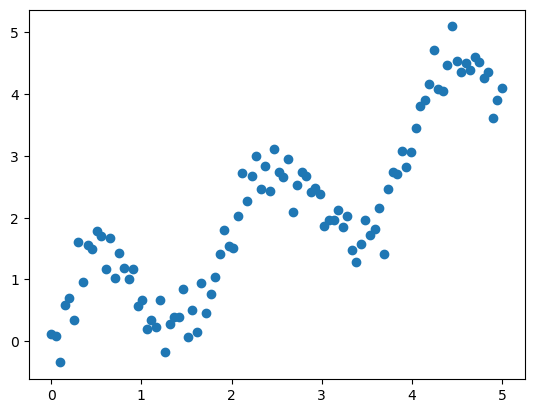

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5438128153321918


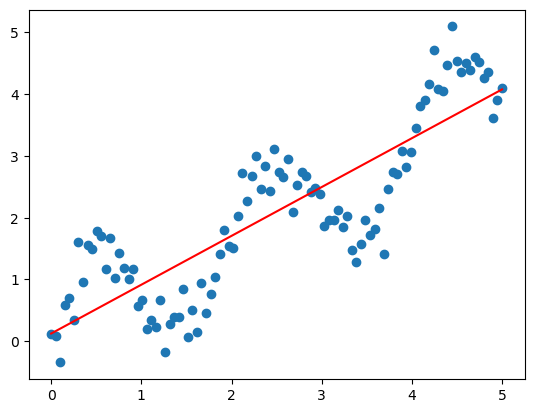

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

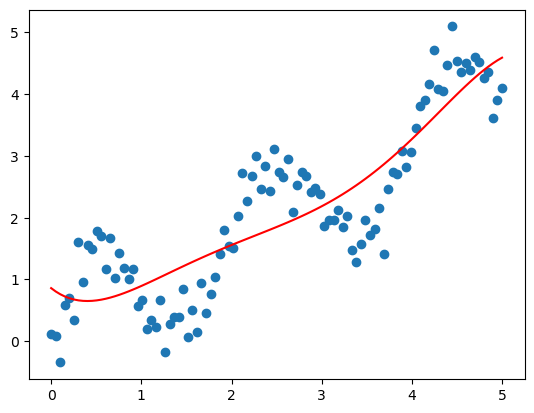

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.16760502  1.96307917 -0.95044975  0.20543819 -0.01571188]
interception:  0.8602509450666935


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.86025095, 0.80616723, 0.7613821 , 0.72520825, 0.6969892 ,
       0.67609871, 0.66194013, 0.65394578, 0.65157637, 0.65432034,
       0.66169324, 0.67323714, 0.68851999, 0.70713501, 0.72870006,
       0.75285701, 0.77927117, 0.8076306 , 0.83764556, 0.86904784,
       0.90159014, 0.93504551, 0.96920666, 1.00388537, 1.03891187,
       1.07413424, 1.10941775, 1.14464425, 1.1797116 , 1.21453297,
       1.2490363 , 1.2831636 , 1.31687041, 1.35012513, 1.38290841,
       1.41521254, 1.44704082, 1.47840695, 1.5093344 , 1.53985581,
       1.57001234, 1.59985306, 1.62943437, 1.65881932, 1.68807703,
       1.71728205, 1.74651376, 1.77585572, 1.80539511, 1.83522202,
       1.86542892, 1.89610998, 1.92736048, 1.95927618, 1.99195271,
       2.02548492, 2.05996633, 2.0954884 , 2.13214004, 2.17000687,
       2.20917069, 2.24970881, 2.29169346, 2.33519113, 2.38026202,
       2.42695933, 2.47532871, 2.52540764, 2.57722475, 2.63079925,
       2.68614033, 2.74324646, 2.80210487, 2.86269085, 2.92496

In [15]:
regr_poly.predict(X_poly)

array([0.86025095, 0.80616723, 0.7613821 , 0.72520825, 0.6969892 ,
       0.67609871, 0.66194013, 0.65394578, 0.65157637, 0.65432034,
       0.66169324, 0.67323714, 0.68851999, 0.70713501, 0.72870006,
       0.75285701, 0.77927117, 0.8076306 , 0.83764556, 0.86904784,
       0.90159014, 0.93504551, 0.96920666, 1.00388537, 1.03891187,
       1.07413424, 1.10941775, 1.14464425, 1.1797116 , 1.21453297,
       1.2490363 , 1.2831636 , 1.31687041, 1.35012513, 1.38290841,
       1.41521254, 1.44704082, 1.47840695, 1.5093344 , 1.53985581,
       1.57001234, 1.59985306, 1.62943437, 1.65881932, 1.68807703,
       1.71728205, 1.74651376, 1.77585572, 1.80539511, 1.83522202,
       1.86542892, 1.89610998, 1.92736048, 1.95927618, 1.99195271,
       2.02548492, 2.05996633, 2.0954884 , 2.13214004, 2.17000687,
       2.20917069, 2.24970881, 2.29169346, 2.33519113, 2.38026202,
       2.42695933, 2.47532871, 2.52540764, 2.57722475, 2.63079925,
       2.68614033, 2.74324646, 2.80210487, 2.86269085, 2.92496

In [16]:
mse = np.sum((regr_poly.predict(X_poly)-y)**2) / len(y)
print(mse)

0.4746068663356216


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])


In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

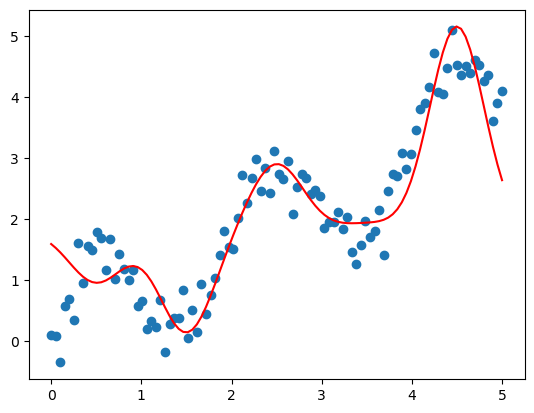

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.8383485  -1.65864228  1.1066822   0.12350839  3.35371816]
interception:  1.805754655104593


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

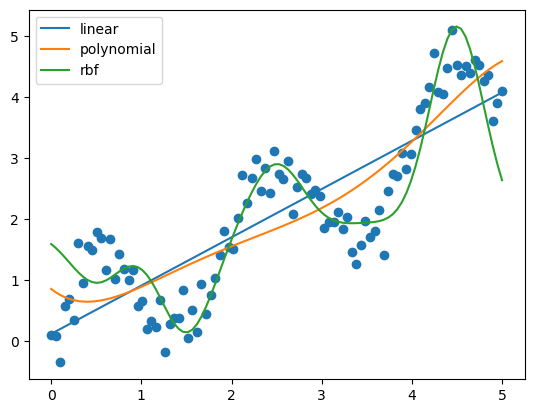

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5438128153321918


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4746068663356216


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2889797846704183
